1.Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import xgboost as xgb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
!pip install scikeras
!pip install --upgrade scikit-learn scikeras tensorflow
from scikeras.wrappers import KerasRegressor


2. Load and Clean Data

In [5]:
df = pd.read_csv('/content/retail_store_inventory.csv')




In [7]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


In [6]:
df.shape

(73100, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

In [9]:
df.describe()

,Date,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,2022-12-31 23:59:59.999999744,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
min,2022-01-01 00:00:00,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,2022-07-02 00:00:00,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,2023-01-01 00:00:00,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,2023-07-03 00:00:00,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,2024-01-01 00:00:00,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000
std,NaN,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408


In [10]:
df.isna().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0


In [12]:
print(df.columns.tolist())

['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing', 'Seasonality']


2.Load and clean data

In [13]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

<Axes: >

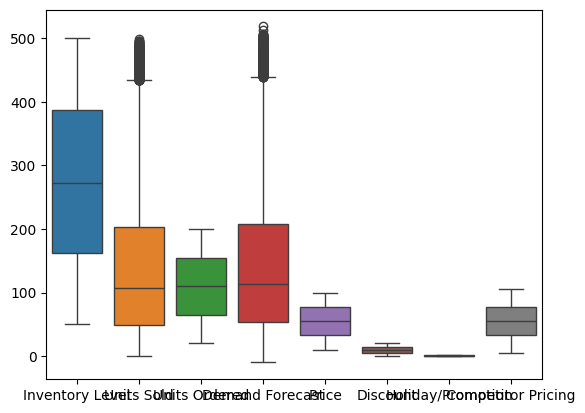

In [ ]:
sns.boxplot(df)

In [ ]:

# Remove outliers using IQR method
numeric_df = df.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


3.Exploratory Data Analysis (Graphs)

/tmp/ipython-input-5-4090785008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.to_period('M').astype(str)


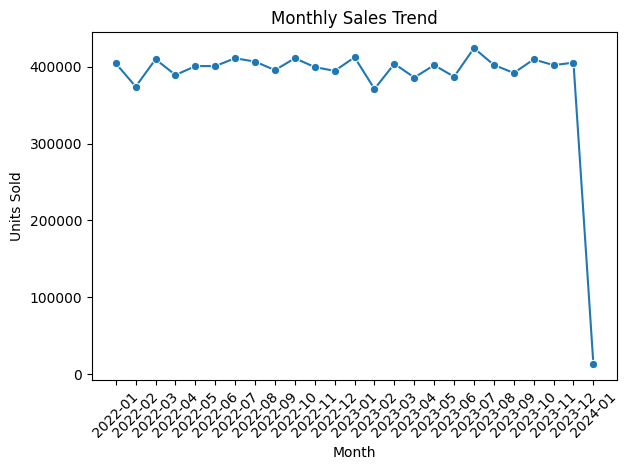

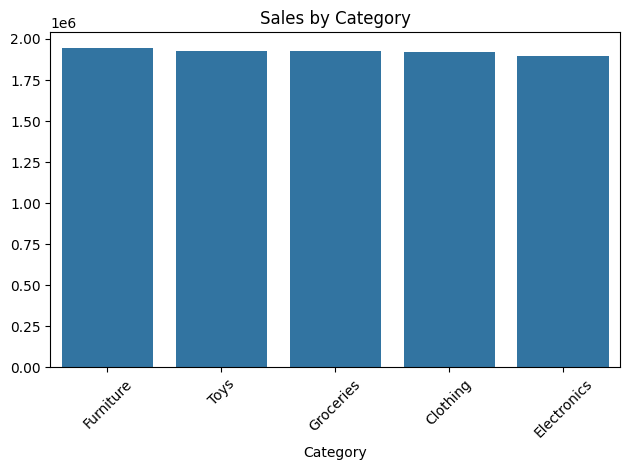

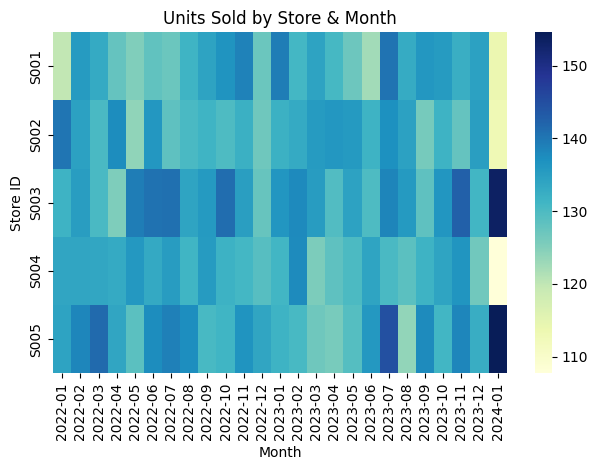

In [ ]:
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Monthly Sales Trend
monthly_sales = df.groupby('Month')['Units Sold'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='Month', y='Units Sold', marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Category Sales
category_sales = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Store-wise Heatmap
pivot = df.pivot_table(index='Store ID', columns='Month', values='Units Sold', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')
plt.title("Units Sold by Store & Month")
plt.tight_layout()
plt.show()


4.Feature Engineering python

In [ ]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Holiday_Season'] = df['Month'].apply(lambda x: 1 if x in [11, 12] else 0)

df.sort_values(by=['Store ID', 'Product ID', 'Date'], inplace=True)
df['Prev_Units_Sold'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].shift(1)
df['Prev_Units_Sold'] = df['Prev_Units_Sold'].fillna(df['Units Sold'].mean())


5.Aggregate Monthly Data

In [ ]:
monthly_df = df.groupby(['Year', 'Month', 'Store ID', 'Product ID']).agg({
    'Units Sold': 'sum',
    'Inventory Level': 'mean',
    'Price': 'mean',
    'Discount': 'mean',
    'Seasonality': 'max',
    'Holiday_Season': 'max',
    'Prev_Units_Sold': 'mean'
}).reset_index()


6.Encode Categorical Variables

In [ ]:
le_store = LabelEncoder()
le_product = LabelEncoder()

monthly_df['Store_enc'] = le_store.fit_transform(monthly_df['Store ID'])
monthly_df['Product_enc'] = le_product.fit_transform(monthly_df['Product ID'])


7.Modeling: Random Forest, XGBoost, Deep Learning

In [ ]:
X_rf = monthly_df[['Year', 'Month', 'Store_enc', 'Product_enc', 'Inventory Level', 'Price', 'Discount']]
X_xgb_dnn = monthly_df[['Year', 'Month', 'Store_enc', 'Product_enc', 'Inventory Level', 'Price', 'Discount', 'Holiday_Season', 'Prev_Units_Sold']]
y = monthly_df['Units Sold']

# Train-Test Split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_xgb_dnn, y, test_size=0.2, random_state=42)


a. Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X1_train, y1_train)

rf_train_pred = rf.predict(X1_train)
rf_test_pred = rf.predict(X1_test)

rf_r2_train = r2_score(y1_train, rf_train_pred)
rf_r2_test = r2_score(y1_test, rf_test_pred)

print("\n===  RANDOM FOREST ===")
print(f"Training R² Score: {rf_r2_train:.4f}")
print(f"Test R² Score    : {rf_r2_test:.4f}")
print(f"MAE              : {mean_absolute_error(y1_test, rf_test_pred):.2f}")
print(f"RMSE             : {np.sqrt(mean_squared_error(y1_test, rf_test_pred)):.2f}")



===  RANDOM FOREST ===
Training R² Score: 0.9623
Test R² Score    : 0.7181
MAE              : 381.41
RMSE             : 486.60


b. XGBoost (with GridSearch)

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0]
}

gs = GridSearchCV(xgb_model, param_grid, cv=3, scoring='r2', n_jobs=-1)
gs.fit(X2_train, y2_train)
best_xgb = gs.best_estimator_

xgb_train_pred = best_xgb.predict(X2_train)
xgb_test_pred = best_xgb.predict(X2_test)

xgb_r2_train = r2_score(y2_train, xgb_train_pred)
xgb_r2_test = r2_score(y2_test, xgb_test_pred)

print("\n===  XGBOOST (Tuned) ===")
print(f"Best Hyperparameters: {gs.best_params_}")
print(f"Training R² Score   : {xgb_r2_train:.4f}")
print(f"Test R² Score       : {xgb_r2_test:.4f}")
print(f"MAE                 : {mean_absolute_error(y2_test, xgb_test_pred):.2f}")
print(f"RMSE                : {np.sqrt(mean_squared_error(y2_test, xgb_test_pred)):.2f}")



===  XGBOOST (Tuned) ===
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Training R² Score   : 0.9768
Test R² Score       : 0.9619
MAE                 : 139.48
RMSE                : 178.86


c. Deep Neural Network

In [ ]:
dnn = Sequential([
    Dense(64, input_shape=(X2_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
dnn.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
dnn.fit(X2_train, y2_train, validation_split=0.1, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

dnn_train_pred = dnn.predict(X2_train).flatten()
dnn_test_pred = dnn.predict(X2_test).flatten()

dnn_r2_train = r2_score(y2_train, dnn_train_pred)
dnn_r2_test = r2_score(y2_test, dnn_test_pred)

print("\n=== DEEP LEARNING (DNN) ===")
print(f"Training R² Score: {dnn_r2_train:.4f}")
print(f"Test R² Score    : {dnn_r2_test:.4f}")
print(f"MAE              : {mean_absolute_error(y2_test, dnn_test_pred):.2f}")
print(f"RMSE             : {np.sqrt(mean_squared_error(y2_test, dnn_test_pred)):.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

=== DEEP LEARNING (DNN) ===
Training R² Score: 0.6374
Test R² Score    : 0.6378
MAE              : 285.53
RMSE             : 551.56


DNN tuned

In [ ]:
# Define the build function
def build_model(hidden1=64, hidden2=32, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden1, input_shape=(X2_train.shape[1],), activation=activation))
    model.add(Dense(hidden2, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Wrap model using KerasRegressor
dnn_grid_model = KerasRegressor(build_fn=build_model, verbose=0)

# Define hyperparameter grid
param_grid_dnn = {
    'model__hidden1': [64, 128],
    'model__hidden2': [32, 64],
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [32],
    'epochs': [50]
}

# Run GridSearch
grid_dnn = GridSearchCV(estimator=dnn_grid_model,
                        param_grid=param_grid_dnn,
                        scoring='r2',
                        cv=3,
                        verbose=1,
                        n_jobs=-1)

grid_dnn.fit(X2_train, y2_train)

# Best estimator
best_dnn_tuned = grid_dnn.best_estimator_

# Predict & Evaluate
dnn_tuned_train_pred = best_dnn_tuned.predict(X2_train)
dnn_tuned_test_pred = best_dnn_tuned.predict(X2_test)

dnn_tuned_r2_train = r2_score(y2_train, dnn_tuned_train_pred)
dnn_tuned_r2_test = r2_score(y2_test, dnn_tuned_test_pred)

print("\n=== DNN (TUNED) ===")
print(f"Best Parameters     : {grid_dnn.best_params_}")
print(f"Training R² Score   : {dnn_tuned_r2_train:.4f}")
print(f"Test R² Score       : {dnn_tuned_r2_test:.4f}")
print(f"MAE                 : {mean_absolute_error(y2_test, dnn_tuned_test_pred):.2f}")
print(f"RMSE                : {np.sqrt(mean_squared_error(y2_test, dnn_tuned_test_pred)):.2f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:699: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  return type_of_target(y)
/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  


=== DNN (TUNED) ===
Best Parameters     : {'batch_size': 32, 'epochs': 50, 'model__activation': 'relu', 'model__hidden1': 64, 'model__hidden2': 64, 'model__optimizer': 'rmsprop'}
Training R² Score   : 0.6409
Test R² Score       : 0.5922
MAE                 : 300.03
RMSE                : 585.26


8. Model Comparison

In [ ]:
r2_scores = {
    'Random Forest': rf_r2_test,
    'XGBoost': xgb_r2_test,
    'DNN (Default)': dnn_r2_test,
    'DNN (Tuned)': dnn_tuned_r2_test
}


In [ ]:
best_model_name = max(r2_scores, key=r2_scores.get)

if best_model_name == 'XGBoost':
    final_model = best_xgb
    final_features = X_xgb_dnn.columns.tolist()
elif best_model_name == 'DNN (Default)':
    final_model = dnn
    final_features = X_xgb_dnn.columns.tolist()
elif best_model_name == 'DNN (Tuned)':
    final_model = best_dnn_tuned
    final_features = X_xgb_dnn.columns.tolist()
else:
    final_model = rf
    final_features = X_rf.columns.tolist()


In [ ]:
print("\n===  MODEL COMPARISON SUMMARY ===")
print(f" Best Model: {best_model_name}")
print(f" R² Scores =>")
print(f"   • Random Forest : {rf_r2_test:.4f}")
print(f"   • XGBoost       : {xgb_r2_test:.4f}")
print(f"   • DNN (Default) : {dnn_r2_test:.4f}")
print(f"   • DNN (Tuned)   : {dnn_tuned_r2_test:.4f}")



===  MODEL COMPARISON SUMMARY ===
 Best Model: XGBoost
 R² Scores =>
   • Random Forest : 0.7181
   • XGBoost       : 0.9619
   • DNN (Default) : 0.6378
   • DNN (Tuned)   : 0.5922


9.User Prediction Input

In [ ]:
# === USER INPUTS ===
user_year = int(input("Enter Year (e.g., 2026): "))
user_month = int(input("Enter Month (1-12): "))
user_store = input("Enter Store ID (e.g., S001): ")
user_product = input("Enter Product ID (e.g., P0001): ")

try:
    store_enc = le_store.transform([user_store])[0]
    product_enc = le_product.transform([user_product])[0]
except ValueError:
    raise ValueError(" Store or Product not found in training data")

subset = df[(df['Store ID'] == user_store) & (df['Product ID'] == user_product)]
if subset.empty:
    raise ValueError("No past data available for this Store/Product combination")

input_data = {
    'Year': user_year,
    'Month': user_month,
    'Store_enc': store_enc,
    'Product_enc': product_enc,
    'Inventory Level': subset['Inventory Level'].mean(),
    'Price': subset['Price'].mean(),
    'Discount': subset['Discount'].mean()
}

if 'Holiday_Season' in final_features:
    input_data['Holiday_Season'] = 1 if user_month in [11, 12] else 0
if 'Prev_Units_Sold' in final_features:
    input_data['Prev_Units_Sold'] = subset['Units Sold'].iloc[-1] if not subset.empty else y.mean()

input_df = pd.DataFrame([input_data])
predicted_units = final_model.predict(input_df[final_features].values)[0] if best_model_name == 'Deep Learning' else final_model.predict(input_df[final_features])[0]

print(f"\n Predicted Units for {user_product} at {user_store} in {user_month}-{user_year}: {predicted_units:.2f}")


Enter Year (e.g., 2026): 2025
Enter Month (1-12): 2
Enter Store ID (e.g., S001): S001
Enter Product ID (e.g., P0001): P0001

 Predicted Units for P0001 at S001 in 2-2025: 187.52


10.Output Inventory Suggestion

In [ ]:
avg_units = y.mean()
if predicted_units > avg_units:
    print(" Suggestion: Stock More")
elif predicted_units < 0.9 * avg_units:
    print("Suggestion: Stock Less")
else:
    print(" Suggestion: Maintain Stock Level")


Suggestion: Stock Less


11.downloading model

In [ ]:
import joblib
import os

# Create export folder
os.makedirs("exported_model", exist_ok=True)

# Save the best XGBoost model
joblib.dump(best_xgb, "exported_model/best_model.pkl")

# Save encoders and feature list
joblib.dump(le_store, "exported_model/store_encoder.pkl")
joblib.dump(le_product, "exported_model/product_encoder.pkl")
joblib.dump(final_features, "exported_model/final_features.pkl")

print("✅ XGBoost model and encoders saved in 'exported_model/'")


✅ XGBoost model and encoders saved in 'exported_model/'
